In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df['Age'].value_counts()



Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [5]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [8]:
survival_rate=pd.crosstab(df['Pclass'],df['Survived'], normalize='index')
print(survival_rate)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


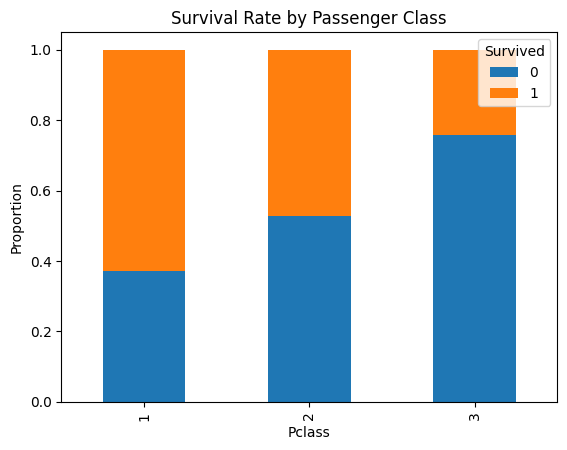

In [9]:
import matplotlib.pyplot as plt
survival_rate.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Proportion')
plt.show()

## Pclass vs. Survived Analysis
- 1st class: ~63% survived, highest survival rate.
- 2nd class: ~47% survived, moderate rate.
- 3rd class: ~24% survived, lowest rate.
- Pattern: Higher class correlates with higher survival.

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
pd.crosstab(index=[df['Sex'],df['Pclass']],columns=df['Survived'], normalize='index')

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

## Pclass and Sex vs Survived
-96% of females in 1st class survived, while only 50% of females in 3rd class survived
-36% of males in first class survived, which dropped to 14% of males in 3rd class
Sex is a stronger indicator of survival than Pclass

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
name_survived = df.loc[:9,['Name','Survived']]
print(name_survived)
#first 10 rows of Name and Survived

                                                Name  Survived
0                            Braund, Mr. Owen Harris         0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...         1
2                             Heikkinen, Miss. Laina         1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)         1
4                           Allen, Mr. William Henry         0
5                                   Moran, Mr. James         0
6                            McCarthy, Mr. Timothy J         0
7                     Palsson, Master. Gosta Leonard         0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)         1
9                Nasser, Mrs. Nicholas (Adele Achem)         1


In [15]:
pclass_sex_age = df.iloc[4:10,[2,4,5]]
print(pclass_sex_age)

   Pclass     Sex   Age
4       3    male  35.0
5       3    male   NaN
6       1    male  54.0
7       3    male   2.0
8       3  female  27.0
9       2  female  14.0


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [16]:
print(df.iloc[41])
df.loc[41,['Age','Name']]
age_41 = df.loc[41,'Age']
print(f"Age at index 41: {age_41}")

PassengerId                                                   42
Survived                                                       0
Pclass                                                         2
Name           Turpin, Mrs. William John Robert (Dorothy Ann ...
Sex                                                       female
Age                                                         27.0
SibSp                                                          1
Parch                                                          0
Ticket                                                     11668
Fare                                                        21.0
Cabin                                                        NaN
Embarked                                                       S
Name: 41, dtype: object
Age at index 41: 27.0


In [17]:
subset_df = df[['Pclass','Fare','Survived']]
print(subset_df.head())

   Pclass     Fare  Survived
0       3   7.2500         0
1       1  71.2833         1
2       3   7.9250         1
3       1  53.1000         1
4       3   8.0500         0


In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch']
print(df[['Name','FamilySize']].head())

                                                Name  FamilySize
0                            Braund, Mr. Owen Harris           1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           1
2                             Heikkinen, Miss. Laina           0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
4                           Allen, Mr. William Henry           0


In [19]:
df['Dataset'] = 'train'
print(df[['PassengerId','Dataset']].head())

   PassengerId Dataset
0            1   train
1            2   train
2            3   train
3            4   train
4            5   train


In [20]:
first_class = df.loc[df.Pclass ==1]
first_class_sr = first_class['Survived'].mean()
print(f"1st class survival rate: {first_class_sr:.2%}")

1st class survival rate: 62.96%


In [21]:
female_p = df.loc[df['Sex']=='female']
print(female_p.iloc[0])
female_p_age = female_p.Age.mean()
print(f"Avg female passenger age: {female_p_age:.1f}")

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
FamilySize                                                     1
Dataset                                                    train
Name: 1, dtype: object
Avg female passenger age: 27.9


In [22]:
large_families = df.loc[df['FamilySize']>3, 'Survived']
lf_survived = large_families.sum()
print(f"Passengers with large families (>3) who survived: {lf_survived}")

Passengers with large families (>3) who survived: 10


## Week 1, Wednesday: Indexing and Selection Practice
- Selected 1st-class passengers: ~63% survival rate.
- Average female age: ~27.9 years.
- Survivors with FamilySize > 3: 10 passengers.
- Created `FamilySize` column for future analysis.

In [23]:
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age distribution on Titanic')

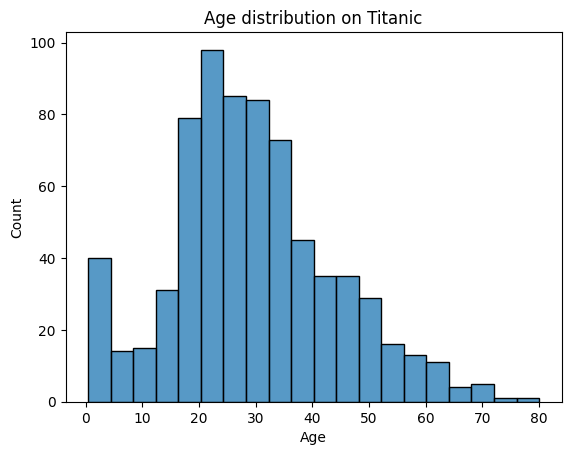

In [24]:
sns.histplot(df['Age'])
plt.title("Age distribution on Titanic")

<Axes: xlabel='Age', ylabel='Fare'>

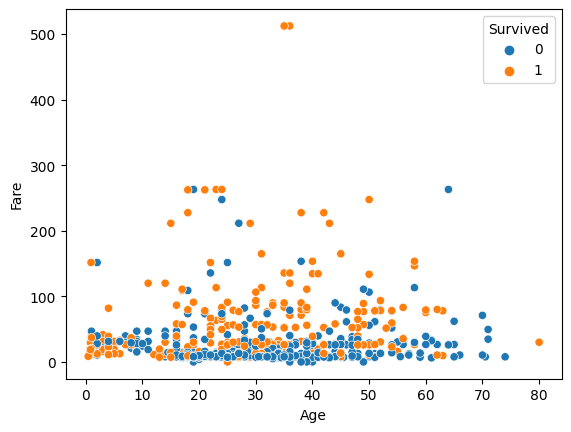

In [25]:
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])

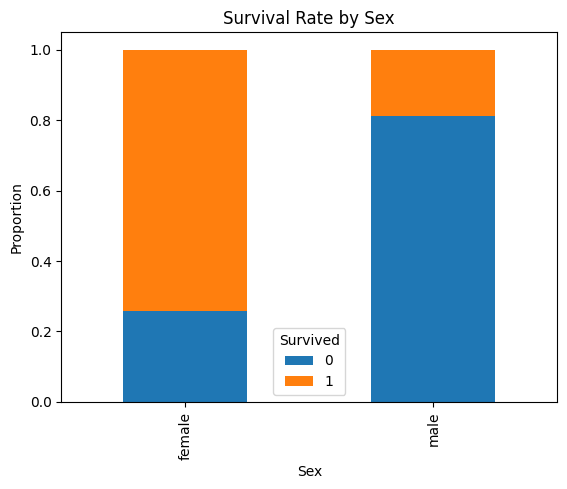

In [26]:
survival_sex = pd.crosstab(df['Sex'],df['Survived'], normalize='index')
survival_sex.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.show()